# LDSW/NLP - #4 - Tools & Vectors

2018-04-06, `hisamoto_s`

![](https://sd.keepcalm-o-matic.co.uk/i-w600/forget-calm-lets-do-something-1.jpg)

## Environment

- Jupyter Notebook
- **JupyterHub** - Multi-user server for Jupyter notebooks
- **JupyterLab** - Next generation Analysis Environment
    - Feb 20, 2018 - [JupyterLab is Ready for Users – Jupyter Blog](https://blog.jupyter.org/jupyterlab-is-ready-for-users-5a6f039b8906)
    - "We plan to release JupyterLab 1.0 later in 2018"
- This is "JupyerLab on JupyterHub" (how confusing)

![](http://jupyterlab.readthedocs.io/en/latest/_images/jupyterlab.png)

![](https://cdn-images-1.medium.com/max/800/1*OneJZOqKqBZ9oN80kRX7kQ.png)

## Data Setup

In [1]:
import pandas as pd

In [2]:
df_sent = pd.read_csv("./data/train/STS.input.MSRvid.txt", sep="\t", names=["sent_1", "sent_2"])
df_sent.head()

,sent_1,sent_2
0,A man is riding a bicycle.,A man is riding a bike.
1,A woman and man are dancing in the rain.,A man and woman are dancing in rain.
2,Someone is drawing.,Someone is dancing.
3,A man and a woman are kissing each other.,A man and a woman are talking to each other.
4,A woman is slicing an onion.,A woman is cutting an onion.


In [3]:
df_score = pd.read_csv("./data/train/STS.gs.MSRvid.txt", sep="\t", names=["score"])
df_score.head()

,score
0,5.0
1,5.0
2,0.3
3,0.6
4,4.2


In [4]:
df = pd.concat([df_score, df_sent], axis=1)
df.head()

,score,sent_1,sent_2
0,5.0,A man is riding a bicycle.,A man is riding a bike.
1,5.0,A woman and man are dancing in the rain.,A man and woman are dancing in rain.
2,0.3,Someone is drawing.,Someone is dancing.
3,0.6,A man and a woman are kissing each other.,A man and a woman are talking to each other.
4,4.2,A woman is slicing an onion.,A woman is cutting an onion.


In [5]:
df.to_csv("./data/datamart.MSRvid.csv", index=False)

## spaCy

[spaCy - Industrial-strength Natural Language Processing in Python](https://spacy.io/)

> Industrial-Strength Natural Language Processing

[Workshop for NLP Open Source Software (NLP-OSS)](https://nlposs.github.io/) - Invited Speakers

In [6]:
import spacy

![](https://spacy.io/assets/img/pipeline.svg)

## Word Embedding

Real-value dense vector representation of a word.

実数値低次元ベクトルで単語を表現。

\- [Word embeddings in 2017: Trends and future directions](http://ruder.io/word-embeddings-2017/)

![](http://ruder.io/content/images/2017/10/semantic_change.png)

Famous "King - Man + Woman = Queen"

有名な "王 - 男 + 女 = 女王"

Hideto Kazawa of Google once said to me "This is psudo-science, smart people do not add vectors".

その昔Googleの賀沢秀人さんに「あれは疑似科学だ。賢い人はベクトルを足したりしない」と言われました。

![](https://s3.amazonaws.com/algorithmia-assets/algo_desc_images/nlp_Word2Vec/word2vec_pca_paper_example.png)

spaCy contains pre-trained vectors. Tokenization too.

spaCyに事前学習済ベクトルが入ってます。Tokenizationもしてくれます。

In [7]:
import numpy as np

In [8]:
%time nlp = spacy.load('en_core_web_lg')

CPU times: user 6.84 s, sys: 18.8 s, total: 25.6 s
Wall time: 27.5 s


[Model Comparison | spaCy Models Documentation](https://spacy.io/models/comparison)

In [9]:
tokens = nlp("A man is riding a bicycle.")

for token in tokens:
    print(token.text, "\t", token.has_vector, token.vector_norm, token.is_oov)

A 	 True 5.3067 False
man 	 True 6.35294 False
is 	 True 4.89031 False
riding 	 True 6.70617 False
a 	 True 5.3067 False
bicycle 	 True 6.65521 False
. 	 True 4.93164 False


In [10]:
len(token.vector)

300

In [11]:
token.vector[:10]

array([ 0.012001  ,  0.20750999, -0.12578   , -0.59324998,  0.12525   ,
        0.15975   ,  0.13748001, -0.33157   , -0.13694   ,  1.78929996], dtype=float32)

### Sentence 2 Vec

How about simply SUMMING the word vectors ...! 

I'm sure there are smarter ways ...!

In [12]:
vec_sum = np.add.reduce([token.vector for token in tokens])
vec_sum[:5]

array([ 0.97004598,  0.99327803, -1.21864474, -1.29505992,  1.66167009], dtype=float32)

### Distance

![Distances](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png)

In [13]:
def get_sum_vec(sentence):
    tokens = nlp(sentence)
    return np.add.reduce([token.vector for token in tokens])

In [14]:
def get_avg_vec(sentence):
    tokens = nlp(sentence)
    return np.add.reduce([token.vector for token in tokens]) / len(tokens)

In [15]:
from scipy.spatial import distance

In [16]:
sent_1 = "A man is riding a bicycle."
sent_2 = "A man is riding a bike."
distance.euclidean(get_sum_vec(sent_1), get_sum_vec(sent_2)), distance.cosine(get_sum_vec(sent_1), get_sum_vec(sent_2))

(3.4654700756073, 0.0072470969419733411)

In [17]:
sent_1 = "Someone is drawing."
sent_2 = "Someone is dancing."
distance.euclidean(get_sum_vec(sent_1), get_sum_vec(sent_2)), distance.cosine(get_sum_vec(sent_1), get_sum_vec(sent_2))

(7.336596488952637, 0.10985393416714329)

### ... let's calc all

In [18]:
df.head()

,score,sent_1,sent_2
0,5.0,A man is riding a bicycle.,A man is riding a bike.
1,5.0,A woman and man are dancing in the rain.,A man and woman are dancing in rain.
2,0.3,Someone is drawing.,Someone is dancing.
3,0.6,A man and a woman are kissing each other.,A man and a woman are talking to each other.
4,4.2,A woman is slicing an onion.,A woman is cutting an onion.


In [19]:
%%time
df["sent_1_vec_sum"] = df.sent_1.apply(get_sum_vec)
df["sent_2_vec_sum"] = df.sent_2.apply(get_sum_vec)
df["sent_1_vec_avg"] = df.sent_1.apply(get_avg_vec)
df["sent_2_vec_avg"] = df.sent_2.apply(get_avg_vec)

CPU times: user 45.7 s, sys: 52.1 s, total: 1min 37s
Wall time: 25.5 s


My friend said Apply in Pandas is very slow so don't use them ...

In [20]:
%%time
df["euclidean_sum"] = df.apply(lambda row: distance.euclidean(row.sent_1_vec_sum, row.sent_2_vec_sum), axis=1)
df["cosine_sum"] = df.apply(lambda row: distance.cosine(row.sent_1_vec_sum, row.sent_2_vec_sum), axis=1)
df["euclidean_avg"] = df.apply(lambda row: distance.euclidean(row.sent_1_vec_avg, row.sent_2_vec_avg), axis=1)
df["cosine_avg"] = df.apply(lambda row: distance.cosine(row.sent_1_vec_avg, row.sent_2_vec_avg), axis=1)

CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 162 ms


In [21]:
df.head()

,score,sent_1,sent_2,sent_1_vec_sum,sent_2_vec_sum,sent_1_vec_avg,sent_2_vec_avg,euclidean_sum,cosine_sum,euclidean_avg,cosine_avg
0,5.0,A man is riding a bicycle.,A man is riding a bike.,"[0.970046, 0.993278, -1.21864, -1.29506, 1.661...","[1.00202, 0.833802, -1.49603, -1.24865, 1.9776...","[0.138578, 0.141897, -0.174092, -0.185009, 0.2...","[0.143145, 0.119115, -0.213719, -0.178379, 0.2...",3.465470,0.007247,0.495067,0.007247
1,5.0,A woman and man are dancing in the rain.,A man and woman are dancing in rain.,"[0.136284, 1.10109, -0.750087, -0.876363, 1.30...","[-0.135756, 1.16312, -0.561687, -0.899588, 1.3...","[0.0136284, 0.110109, -0.0750087, -0.0876363, ...","[-0.015084, 0.129235, -0.0624097, -0.0999542, ...",4.709350,0.004921,0.371628,0.004921
2,0.3,Someone is drawing.,Someone is dancing.,"[-0.264702, 1.0228, -0.868892, -0.62101, 0.345...","[-0.353269, 0.87706, -0.715998, -0.536533, 0.9...","[-0.0661755, 0.2557, -0.217223, -0.155253, 0.0...","[-0.0883172, 0.219265, -0.178999, -0.134133, 0...",7.336596,0.109854,1.834149,0.109854
3,0.6,A man and a woman are kissing each other.,A man and a woman are talking to each other.,"[-1.20586, -0.771626, -2.33537, -0.096347, 2.2...","[-0.850506, 0.453724, -2.64864, 0.26765, 1.995...","[-0.120586, -0.0771626, -0.233537, -0.0096347,...","[-0.0773187, 0.0412476, -0.240785, 0.0243318, ...",8.728336,0.021436,0.781043,0.021436
4,4.2,A woman is slicing an onion.,A woman is cutting an onion.,"[-1.19685, 1.31592, 0.0957463, 0.40963, 1.0724...","[-1.08647, 2.136, -0.0858037, 0.09977, 0.94892...","[-0.170978, 0.187988, 0.013678, 0.0585186, 0.1...","[-0.15521, 0.305143, -0.0122577, 0.0142529, 0....",5.273083,0.020499,0.753298,0.020499


Melting (un-pivotting) ...

In [22]:
df_vertical = df.melt(id_vars=["score"], value_vars=["euclidean_sum", "cosine_sum", "euclidean_avg", "cosine_avg"])
df_vertical.head()

,score,variable,value
0,5.0,euclidean_sum,3.465470
1,5.0,euclidean_sum,4.709350
2,0.3,euclidean_sum,7.336596
3,0.6,euclidean_sum,8.728336
4,4.2,euclidean_sum,5.273083


In [23]:
df_vertical.variable.apply(lambda x: x.split("_"))[:5]

0    [euclidean, sum]
1    [euclidean, sum]
2    [euclidean, sum]
3    [euclidean, sum]
4    [euclidean, sum]
Name: variable, dtype: object

In [24]:
df_vertical["distance"] = df_vertical.variable.apply(lambda x: x.split("_")[0])
df_vertical["vector"] = df_vertical.variable.apply(lambda x: x.split("_")[1])
df_vertical.drop("variable", inplace=True, axis=1)

In [25]:
df_vertical.head(10)

,score,value,distance,vector
0,5.00,3.465470,euclidean,sum
1,5.00,4.709350,euclidean,sum
2,0.30,7.336596,euclidean,sum
3,0.60,8.728336,euclidean,sum
4,4.20,5.273083,euclidean,sum
5,3.60,8.022580,euclidean,sum
6,5.00,5.273083,euclidean,sum
7,2.75,6.331084,euclidean,sum
8,5.00,8.237260,euclidean,sum
9,3.75,7.709869,euclidean,sum


### ... and viz

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

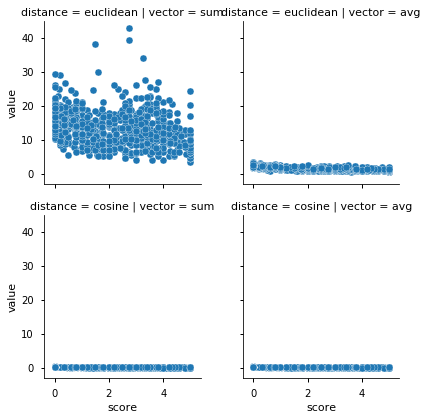

In [28]:
g = sns.FacetGrid(df_vertical, row="distance", col="vector")
g = g.map(plt.scatter, "score", "value", edgecolor="w")

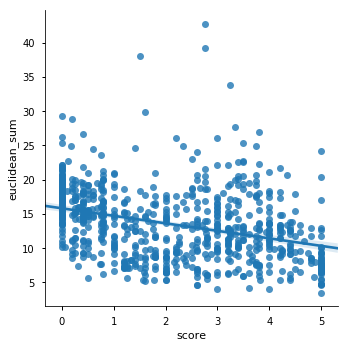

In [29]:
sns.lmplot(x="score", y="euclidean_sum", data=df)

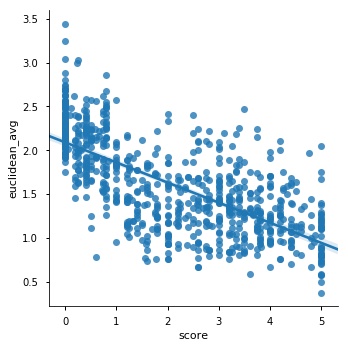

In [30]:
sns.lmplot(x="score", y="euclidean_avg", data=df)

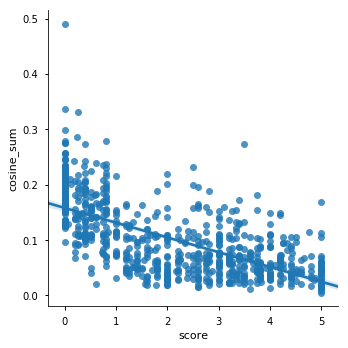

In [31]:
sns.lmplot(x="score", y="cosine_sum", data=df)

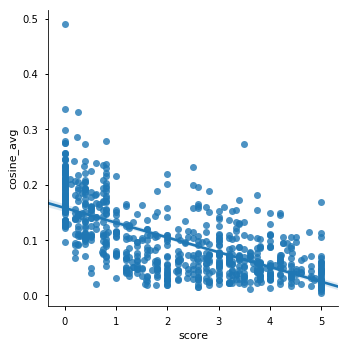

In [32]:
sns.lmplot(x="score", y="cosine_avg", data=df)

## Discussions

- Representing Vector
    - What does it mean to SUM / AVG the vectors?
    - SUMMING : The MAGNITUDE depends on the sentence length (#tokens)?
    - More clever ways in the world : Recent advances in Neural NLP
- Distributional Hypothesis
    - "a word is characterized by the company it keeps" (Firth, 1957)
    - "love" and "hate" can have same context in the corpus
- Bag of Words
    - "Dog bite man" and "Man bite dog" same
    - Linguistics!
- Knowledge
    - WordNet, ...

- Short Sentence -> Mostly `"<Subject> <Action> <Object>" + some Adjs`?

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJk1Joxn7pf87wIbj3kBfpH143MdIWef6kk66QeMXO35rDVWZuKA)